# Python Correlation

This project is designed to explore a dataset comprising of three decades of movie data (1986-2016), scraped from IMDb using Python. The dataset can be found [here](https://www.kaggle.com/danielgrijalvas/movies).

We will be using data exploration and visualization techniques in order to find correlations between data points.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

from scipy import stats

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts configuration of future plots

movies = pd.read_csv('movies.csv')

## Cleaning the Data

In [2]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


At a glance, we immediately see three potential issues:
1. The columns labeled `votes`, `budget`, `gross`, and `runtime` are float type objects, even though their entries are clearly rounded numbers with ".0" pointlessly tacked on to the end.
2. 11 out of 14 columns contain null values, although most of them have very few.
3. Some of the column names like `score`, `gross`, and `votes` could be changed to be more descriptive.

We will begin with the first issue, by changing the entries from floats to integers.

### Converting unnecessary floats to integers

In [4]:
movies['votes'] = movies['votes'].astype('Int64')
movies['budget'] = movies['budget'].astype('Int64')
movies['gross'] = movies['gross'].astype('Int64')
movies['runtime'] = movies['runtime'].astype('Int64')

### Renaming columns
Using the more detailed column information found on [Kaggle](https://www.kaggle.com/danielgrijalvas/movies), we will rename several columns to make them more descriptive:
1. `score` into `IMDb_score`
2. `votes` into `IMDb_votes`
3. `star` into `lead_actor`
4. `gross` into `gross_revenue`

In [5]:
movies.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [6]:
movies.columns = ['name', 'rating', 'genre', 'year', 'released', 'IMDb_score', 'IMDb_votes',
       'director', 'writer', 'lead_actor', 'country', 'budget', 'gross_revenue', 'company',
       'runtime']

### Dropping duplicate rows

In [7]:
movies = movies.drop_duplicates()

In [8]:
movies.info()
movies.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7668 non-null   object 
 1   rating         7591 non-null   object 
 2   genre          7668 non-null   object 
 3   year           7668 non-null   int64  
 4   released       7666 non-null   object 
 5   IMDb_score     7665 non-null   float64
 6   IMDb_votes     7665 non-null   Int64  
 7   director       7668 non-null   object 
 8   writer         7665 non-null   object 
 9   lead_actor     7667 non-null   object 
 10  country        7665 non-null   object 
 11  budget         5497 non-null   Int64  
 12  gross_revenue  7479 non-null   Int64  
 13  company        7651 non-null   object 
 14  runtime        7664 non-null   Int64  
dtypes: Int64(4), float64(1), int64(1), object(9)
memory usage: 988.5+ KB


,name,rating,genre,year,released,IMDb_score,IMDb_votes,director,writer,lead_actor,country,budget,gross_revenue,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


After a quick check, it is apparent that there are no duplicate entries.

## Visualizing Correlation Between `budget` and `gross_revenue`

We will now explore correlations between different columns, beginning with `budget` and `gross_revenue`.

First, because we know there are null values in both columns, especially the budget column, we will create a separate dataframe with only the two relevant columns. Then we will remove all rows with null values, and sort by `gross_revenue`.

In [9]:
pd.set_option('display.max_rows', None) #"movies" will now always print every row, instead of a few from the head and tail

In [10]:
movies_budget_revenue = movies.loc[:, ['budget','gross_revenue']]

In [11]:
movies_budget_revenue = movies_budget_revenue.dropna()

In [12]:
movies_budget_revenue = movies_budget_revenue.sort_values(by=['gross_revenue'], ascending=False)

In [13]:
movies_budget_revenue.head(10)

,budget,gross_revenue
5445,237000000,2847246203
7445,356000000,2797501328
3045,200000000,2201647264
6663,245000000,2069521700
7244,321000000,2048359754
7480,260000000,1670727580
6653,150000000,1670516444
6043,220000000,1518815515
6646,190000000,1515341399
7494,150000000,1450026933


### Using Matplotlib

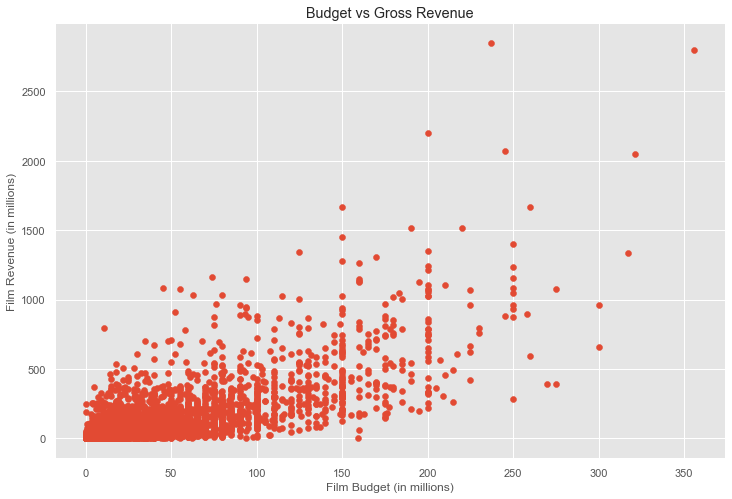

In [14]:
plt.scatter(x=movies_budget_revenue['budget'], y=movies_budget_revenue['gross_revenue'])
plt.title('Budget vs Gross Revenue')
plt.ticklabel_format(axis='both', style='plain')
plt.xlabel('Film Budget (in millions)')
plt.xticks(ticks=np.arange(0, 400000000, step=50000000), labels=['0','50', '100', '150', '200', '250', '300','350'])
plt.ylabel('Film Revenue (in millions)')
plt.yticks(ticks=np.arange(0, 3000000000, step=500000000), labels=['0','500', '1000', '1500', '2000', '2500'])
plt.show()

In [15]:
movies_budget_revenue.corr()

,budget,gross_revenue
budget,1.000000,0.740395
gross_revenue,0.740395,1.000000


There appears to be a moderate **positive correlation** between the two columns. We used `movies_budget_revenue.corr()` (Pearson method by default) to confirm this. In order to visualize this better, we will use seaborn and will have to convert the integers back into floats.

### Using Seaborn

In [16]:
movies_budget_revenue['budget'] = movies_budget_revenue['budget'].astype('float')
movies_budget_revenue['gross_revenue'] = movies_budget_revenue['gross_revenue'].astype('float')

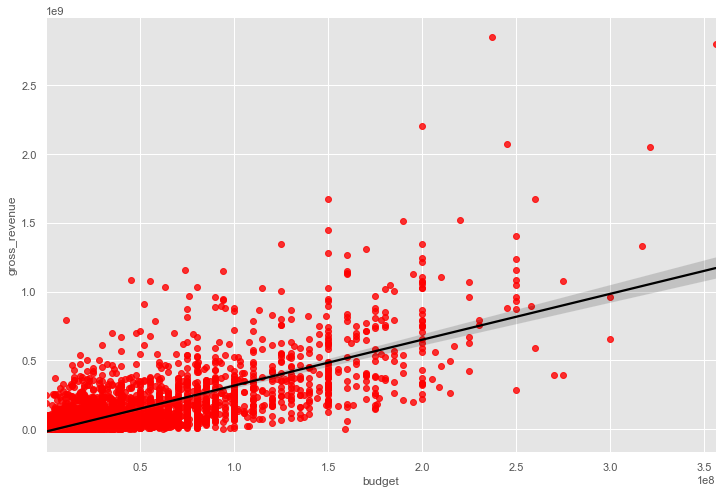

In [17]:
sns.regplot(x='budget', y='gross_revenue', data=movies_budget_revenue, scatter_kws={"color": "red"}, line_kws={"color":  "black"})

## Visualizing Correlations Between all Numeric Columns

In [18]:
movies.dropna().corr()

,year,IMDb_score,IMDb_votes,budget,gross_revenue,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
IMDb_score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
IMDb_votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross_revenue,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


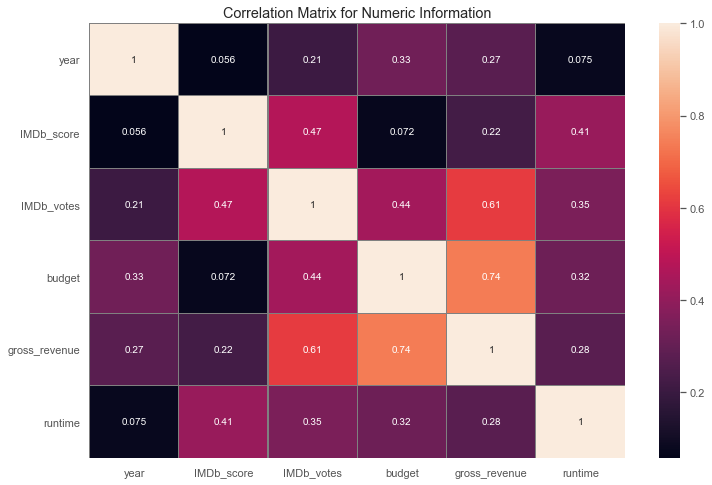

In [19]:
correlation_matrix = movies.dropna().corr()

sns.heatmap(correlation_matrix, annot=True, linewidths=.25, linecolor='grey')
plt.title('Correlation Matrix for Numeric Information')

plt.show()

As shown in the correlation matrix above, the correlation between `budget` and `gross_revenue` is the strongest.

The only other categories on our heat map with a moderate positive correlation between them are `IMDb_votes` and `gross_revenue`. This makes sense considering that a film's revenue is directly related to the number of people that watched it, which would in turn likely increase the number of people who would vote on the movie on IMDb.

## Correlation Between No. of Films and Avg. Revenue/Budget by Company
In order to compare average revenues and budgets with the number of films made by each corresponding company, we will make a new table that will contain four columns:
1. Unique company names
2. The average revenue of all films for each corresponding company
3. The average budget by company
4. The number of films made by each company

Then we will use seaborn to create a relational plot to help analyze our data.

### Compiling New Dataframe
We will begin by removing rows with null values in the `company` and `gross_revenue` columns from our `movies` dataframe.

In [20]:
movies_avg = movies.dropna(subset=['company','gross_revenue','budget'])

In [21]:
movies_avg = movies_avg.set_axis(list(range(0,len(movies_avg))))

In [22]:
movies_avg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5434 entries, 0 to 5433
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5434 non-null   object 
 1   rating         5422 non-null   object 
 2   genre          5434 non-null   object 
 3   year           5434 non-null   int64  
 4   released       5434 non-null   object 
 5   IMDb_score     5434 non-null   float64
 6   IMDb_votes     5434 non-null   Int64  
 7   director       5434 non-null   object 
 8   writer         5434 non-null   object 
 9   lead_actor     5434 non-null   object 
 10  country        5433 non-null   object 
 11  budget         5434 non-null   Int64  
 12  gross_revenue  5434 non-null   Int64  
 13  company        5434 non-null   object 
 14  runtime        5433 non-null   Int64  
dtypes: Int64(4), float64(1), int64(1), object(9)
memory usage: 700.5+ KB


We will create two lists which will be converted into a pandas dataframe comprised of company names and their corresponding average gross film revenue.

In [23]:
company_list = [] # unique company list
avg_revenue = [] # avg rev by company
avg_budget = [] # avg budget by company
for company in movies_avg['company'].unique():
    company_list.append(company)
    temp_df = movies_avg[movies_avg['company'] == company]
    avg_revenue.append(temp_df['gross_revenue'].mean())
    avg_budget.append(temp_df['budget'].mean())

In [24]:
companies = pd.DataFrame(zip(company_list, avg_revenue, avg_budget))

In [25]:
companies

,0,1,2
0,Warner Bros.,1.831880e+08,6.544582e+07
1,Columbia Pictures,1.402531e+08,5.136459e+07
2,Lucasfilm,7.185352e+08,1.149000e+08
3,Paramount Pictures,1.434470e+08,4.918799e+07
4,Orion Pictures,2.546180e+07,1.249787e+07
5,Universal Pictures,1.552761e+08,4.845373e+07
6,Chartoff-Winkler Productions,5.376846e+07,1.500000e+07
7,Dovemead Films,8.406816e+07,4.650000e+07
8,United Artists,6.416765e+07,1.821000e+07
9,The Malpaso Company,2.969105e+07,8.225000e+06


We will quickly confirm that the numbers are correct.

In [26]:
wb_df = movies_avg[movies_avg['company'] == 'Warner Bros.']
wb_df['gross_revenue'].mean()

183187968.7424749

In [27]:
cp_df = movies_avg[movies_avg['company'] == 'Columbia Pictures']
cp_df['budget'].mean()

51364592.71523179

First we will rename the columns.

In [28]:
companies.columns = ['company', 'avg_film_revenue', 'avg_budget']

In [29]:
companies = companies.sort_values(by=['company'])
companies

,company,avg_film_revenue,avg_budget
845,"""DIA"" Productions GmbH & Co. KG",4.435093e+07,3.600000e+07
1463,"""Weathering With You"" Film Partners",1.934575e+08,1.110000e+07
567,.406 Production,1.058000e+04,2.500000e+05
548,1492 Pictures,1.086281e+08,8.000000e+07
107,1818 Productions,1.223263e+07,5.000000e+06
855,19 Entertainment,4.928883e+06,1.200000e+07
1385,1978 Films,4.065640e+07,1.800000e+07
1252,1984 Private Defense Contractors,5.883438e+07,2.800000e+07
809,2 Loop Films,2.643490e+05,5.000000e+05
1459,2.0 Entertainment,1.228104e+08,4.200000e+07


Now we will add the new column, `num_films`, using the map function.

In [30]:
companies['num_films'] = companies['company'].map(movies_avg['company'].value_counts())
companies

,company,avg_film_revenue,avg_budget,num_films
845,"""DIA"" Productions GmbH & Co. KG",4.435093e+07,3.600000e+07,1
1463,"""Weathering With You"" Film Partners",1.934575e+08,1.110000e+07,1
567,.406 Production,1.058000e+04,2.500000e+05,1
548,1492 Pictures,1.086281e+08,8.000000e+07,2
107,1818 Productions,1.223263e+07,5.000000e+06,1
855,19 Entertainment,4.928883e+06,1.200000e+07,1
1385,1978 Films,4.065640e+07,1.800000e+07,1
1252,1984 Private Defense Contractors,5.883438e+07,2.800000e+07,1
809,2 Loop Films,2.643490e+05,5.000000e+05,1
1459,2.0 Entertainment,1.228104e+08,4.200000e+07,1


In [31]:
movies_avg['company'].value_counts().sort_index() # confirming that num_films entries are correct

"DIA" Productions GmbH & Co. KG                                      1
"Weathering With You" Film Partners                                  1
.406 Production                                                      1
1492 Pictures                                                        2
1818 Productions                                                     1
19 Entertainment                                                     1
1978 Films                                                           1
1984 Private Defense Contractors                                     1
2 Loop Films                                                         1
2.0 Entertainment                                                    1
2.4.7. Films                                                         1
2003 Productions                                                     1
20th Century Studios                                                 1
21 Laps Entertainment                                                2
21st C

In [32]:
companies.info() # just double checking dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1481 entries, 845 to 1390
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1481 non-null   object 
 1   avg_film_revenue  1481 non-null   float64
 2   avg_budget        1481 non-null   float64
 3   num_films         1481 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 57.9+ KB


### Visualizing Average Budget vs. Average Revenue vs. Number of Films Made

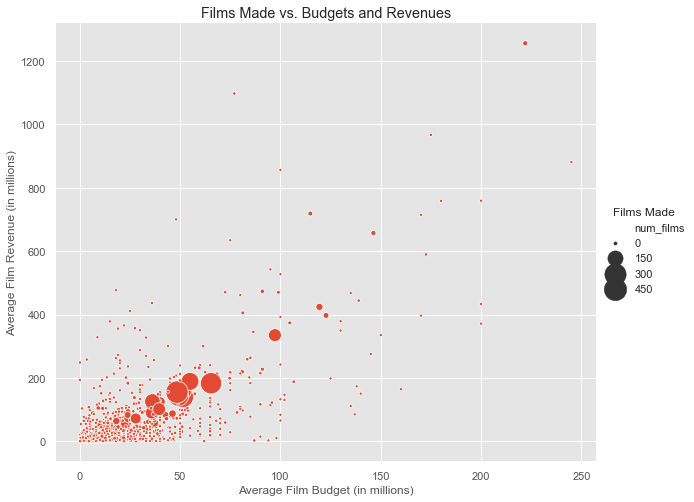

In [76]:
my_plot = sns.relplot(data=companies, x='avg_budget', y='avg_film_revenue', size='num_films', sizes=(10,500), height=7, aspect=1.2)
my_plot._legend.set_title('Films Made') ### Figure out how to reformat the legend without deleting and creating new one
plt.title('Films Made vs. Budgets and Revenues')
plt.ticklabel_format(axis='both', style='plain')
plt.xlabel('Average Film Budget (in millions)')
plt.xticks(ticks=np.arange(0, 300000000, step=50000000), labels=['0','50', '100', '150', '200', '250'])
plt.ylabel('Average Film Revenue (in millions)')
plt.yticks(ticks=np.arange(0, 1400000000, step=200000000), labels=['0','200', '400', '600', '800', '1000', '1200'])
plt.show()


At a glance, there appears to be no correlation between the number films made by a company and that company's average budget or average revenue. This is confirmed below using a correlation matrix.

In [34]:
companies.corr()

,avg_film_revenue,avg_budget,num_films
avg_film_revenue,1.000000,0.712273,0.096888
avg_budget,0.712273,1.000000,0.105134
num_films,0.096888,0.105134,1.000000


## Histograms of IMDb Scores
We will quickly create a histogram to show the distribution of IMDb user ratings for the movies in our dataset.

In [35]:
movies['IMDb_score'].unique()

array([8.4, 5.8, 8.7, 7.7, 7.3, 6.4, 7.9, 8.2, 6.8, 7. , 6.1, 5.3, 7.1,
       7.2, 6.6, 6.9, 6.5, 6.7, 5. , 6.2, 5.4, 6.3, 6. , 5.9, 7.5, 4.8,
       4.6, 5.1, 8.3, 4.2, 5.5, 8.1, 4.7, 5.2, 7.4, 4. , 4.3, 7.6, 4.9,
       3.4, 7.8, 5.6, 2.7, 2.9, 4.4, 8. , 5.7, 3.7, 3.6, 3.9, 3.5, 3.8,
       4.1, 3. , 4.5, 8.5, 3.2, 2.6, 2.2, 3.1, 8.6, 8.9, 9.3, 8.8, 3.3,
       2.5, 2.3, 2.1, 1.9, 2.4, 2.8, 9. , nan])

In [36]:
movies['IMDb_score'].min()

1.9

In [37]:
movies['IMDb_score'].max()

9.3

In [38]:
movies_score = movies.dropna(subset=['IMDb_score'])

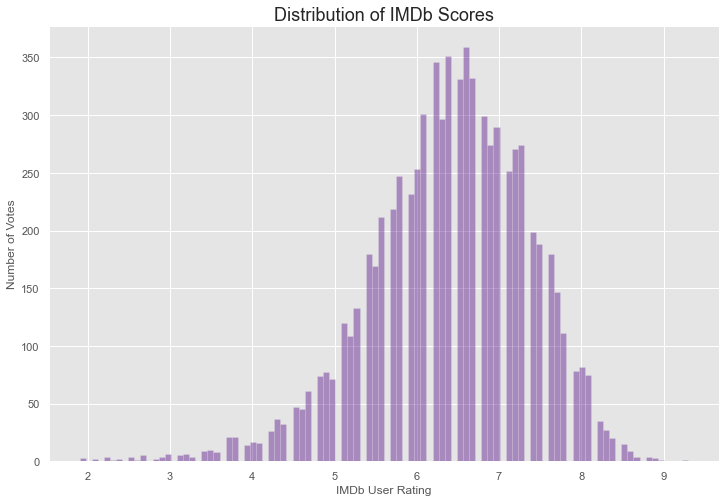

In [64]:
sns.distplot(movies_score['IMDb_score'], kde=False, color='indigo', bins=100) # Changed to histplot() and displot() in newer versions of seaborn
plt.title('Distribution of IMDb Scores', fontsize=18)
plt.xlabel('IMDb User Rating')
plt.ylabel('Number of Votes')
plt.show()

The distribution of scores appears to be virtually symmetrical but very slightly left-skewed. We can confirm this below by seeing that the mode is slightly greater than the median, which is slightly greater than the mean.

In [40]:
movies_score['IMDb_score'].mode()

0    6.6
dtype: float64

In [41]:
movies_score['IMDb_score'].median()

6.5

In [42]:
movies_score['IMDb_score'].mean()

6.390410958904098

In [43]:
movies_score['IMDb_score'].std()

0.9688416402530576

### Comparing the US and UK IMDb Scores
We want to compare the distribution of IMDb scores between the US and the UK on one plot. If there is a difference between the means of the two samples, we will check to see if the difference is statistically significant.

In [44]:
movies_score['country'].value_counts()

United States                     5472
United Kingdom                     816
France                             279
Canada                             190
Germany                            117
Australia                           92
Japan                               81
India                               62
Italy                               61
Spain                               47
Hong Kong                           45
Ireland                             43
China                               40
South Korea                         35
Denmark                             32
Sweden                              25
New Zealand                         25
Mexico                              22
Norway                              12
Netherlands                         12
West Germany                        12
Switzerland                         10
Iran                                10
Czech Republic                       8
Russia                               8
South Africa             

We chose to compare the US and UK because they both have large sample sizes (5,472 and 816 respectively).

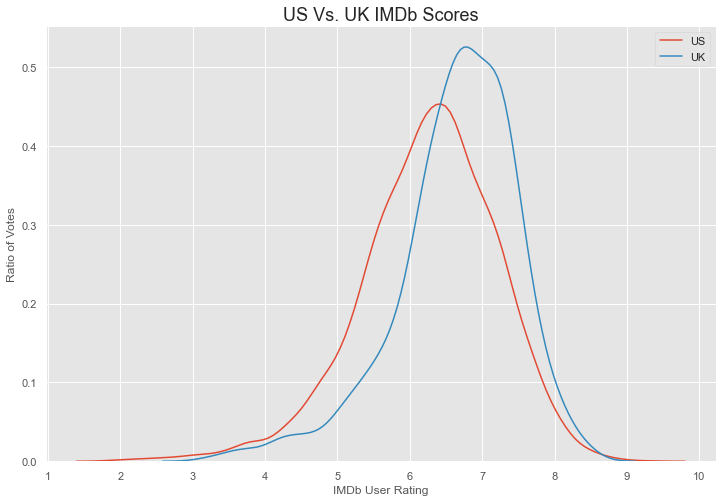

In [68]:
US_movies = movies_score[movies_score['country'] == 'United States']
UK_movies = movies_score[movies_score['country'] == 'United Kingdom']

sns.distplot(US_movies['IMDb_score'], hist=False, label='US')
sns.distplot(UK_movies['IMDb_score'], hist=False, label='UK')
plt.title('US Vs. UK IMDb Scores', fontsize=18)
plt.xlabel('IMDb User Rating')
plt.xticks(ticks=np.arange(1, 11, step=1), labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
plt.ylabel('Ratio of Votes')
plt.show()

The "US Vs. UK IMDb Scores" graph shows that both samples have near normal distributions. They also have relatively low standard devations (less than 0.95) which we confirm below. Based on the image, it is clear that the mean score for films made in the UK is higher than that of the US in our dataset. Below we show these values.

Furthermore we will perform a t-test to determine the validity of the **null hypothesis** (That there is no correlation between the country a film was made in and its average score on IMDb).

In [46]:
US_movies['IMDb_score'].mode()

0    6.4
dtype: float64

In [47]:
US_movies['IMDb_score'].median()

6.3

In [48]:
US_movies['IMDb_score'].mean()

6.25707236842104

In [49]:
US_movies['IMDb_score'].std()

0.9491038302890704

In [59]:
US_movies['IMDb_score'].var()

0.9007980806693845

In [50]:
UK_movies['IMDb_score'].mode()

0    6.8
dtype: float64

In [51]:
UK_movies['IMDb_score'].median()

6.7

In [52]:
UK_movies['IMDb_score'].mean()

6.642769607843138

In [53]:
UK_movies['IMDb_score'].std()

0.8410170155674367

In [60]:
UK_movies['IMDb_score'].var()

0.707309620473958

In [72]:
stats.ttest_ind(US_movies['IMDb_score'], UK_movies['IMDb_score'])

Ttest_indResult(statistic=-10.983172782678478, pvalue=8.231425012886101e-28)

In [73]:
stats.ttest_ind(US_movies['IMDb_score'], UK_movies['IMDb_score'], equal_var=False)

Ttest_indResult(statistic=-12.009602773543353, pvalue=2.2021595184680346e-31)

### Analysis: Country's effect on Score

Since the variances of both samples are relatively similar and our function(`scipy.stats.ttest_ind()`) allows for it, we did two t-tests: one where variances are assumed to be the same, and one where they are not. The latter underestimates the p-value to make up for unequal variances in our data.

The resulting absolute values of the t-scores ("statistic" in the output) are very high, while the p-values are incredibly low, and far below commonly used parameters such as 0.05 or 0.01. We now know the probability that the difference between the means is due to chance is negigible.  With this information, we can reliably **reject the null hypothesis**. There is a statistically significant relationship between the average score a film receives on IMDb and the country that film was made in, at least when it comes to the US and UK.

It could be within the scope of this project to examine this correlation further between other countries, although some would have very limited sample sizes. Additionally, there are multiple potentially confounding variables, both inside and outside of our dataset, including the number of votes on IMDb, the countries in which IMDb users live, the years the movies were made, a particular movie's popularity before and after the existence of IMDb scores, etc.

Beyond this preliminary analysis, it is not possible to immediately understand the connection between country of origin and IMDb score. Deeper analysis must be done that cannot be accomplished with only the data here.